## Heatmap - 40 x 40 Grid - Tesseract, 6 Dimensional ##

Name 'Tesseract' as with 6 dimensions, rather than 3 for a cubic heatmap.
Technically, these interactions form a 6 dimensional Hyper-Hyper-Tesseract.
Heatmaps generated on all six dimensional axes are represented by a 2x2 heat maps each
(This is a potentially useful proof of non-randomness in sets).

Libraries used :

Pandas, Torch, Matplotlib (and mpl_toolkits), SciPy, Seaborn, Numpy

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from scipy import sparse
import seaborn as sns
import numpy as np
import random

In [2]:
# Load the historical data
file_path = 'lotto_history.csv'
data = pd.read_csv(file_path)

In [3]:
# Extract Balls 1 to 6
ball_columns = ['Ball_1', 'Ball_2', 'Ball_3', 'Ball_4', 'Ball_5', 'Ball_6']
balls_data = data[ball_columns]

In [4]:
print(data.shape)

(699, 8)


<Figure size 1200x1000 with 0 Axes>

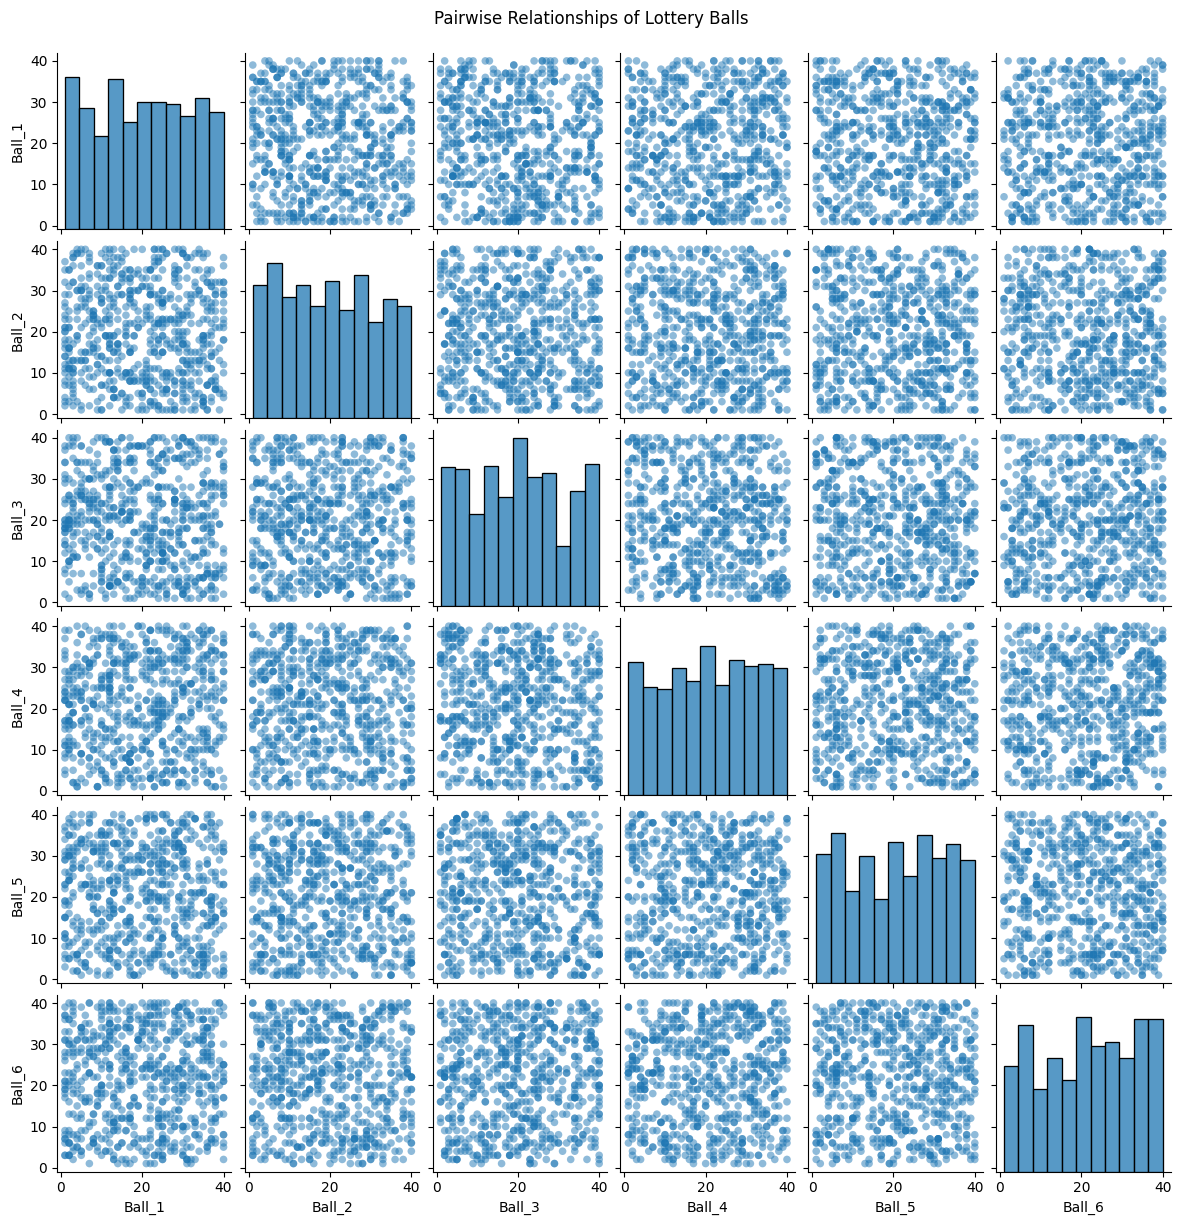

In [5]:
# Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(data=balls_data, height=2, kind="scatter", plot_kws={'alpha': 0.5, 's': 30, 'edgecolor': 'none'})
plt.suptitle('Pairwise Relationships of Lottery Balls', y=1.02)
plt.show()

In [6]:
# Compute the correlation matrix
corr_matrix = balls_data.corr()

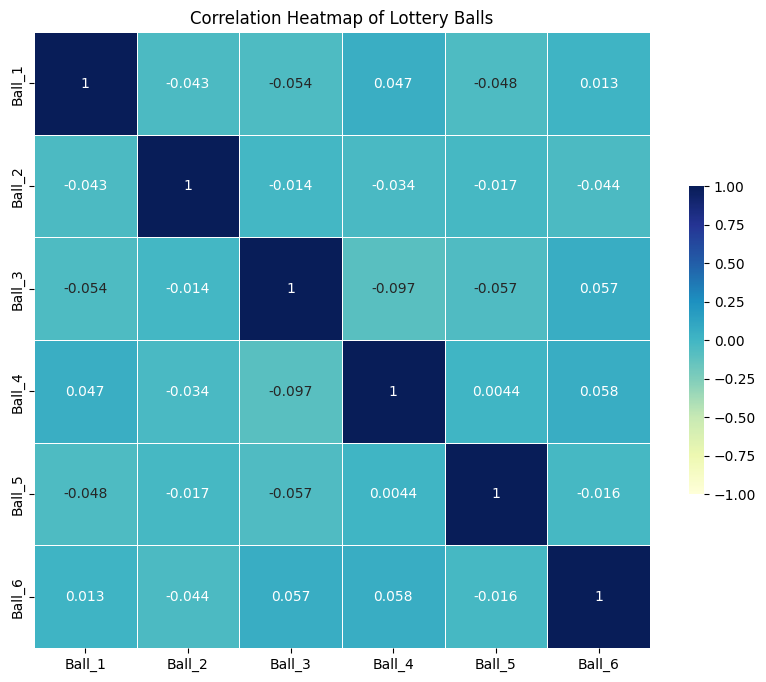

In [8]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="YlGnBu", 
            vmin=-1, vmax=1, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Lottery Balls')
plt.show()

# The correlation matrix is a heatmap of sorts. One thing that does stand out on running it is that 
# correlation ball-to-ball is not only close to zero, but also varies ball-to-ball, and that it is even.
# This is in general within the range that a Neural Network might potentially make use of as an activation function,
# following pre-processing of data.

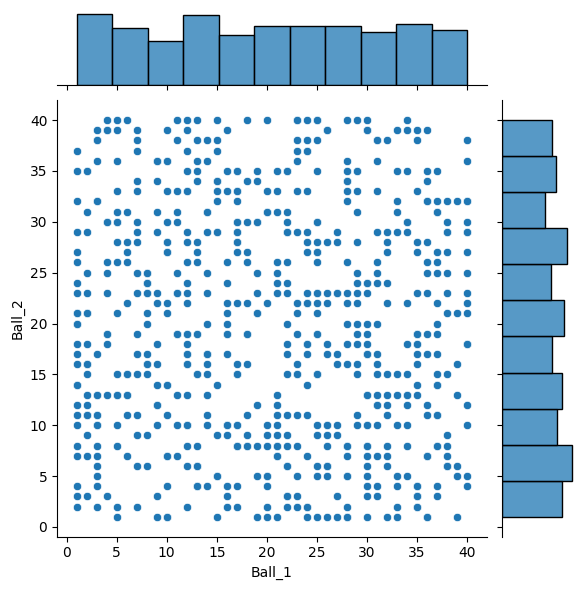

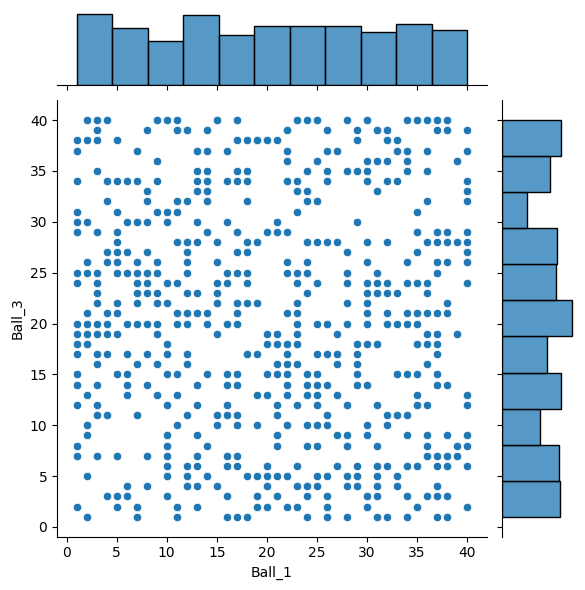

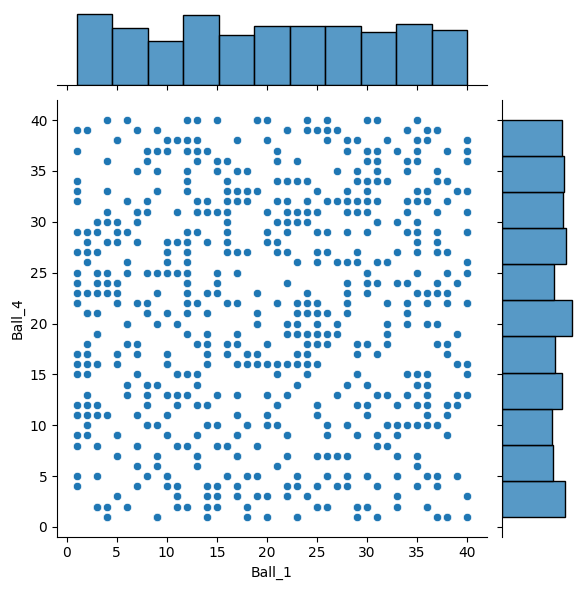

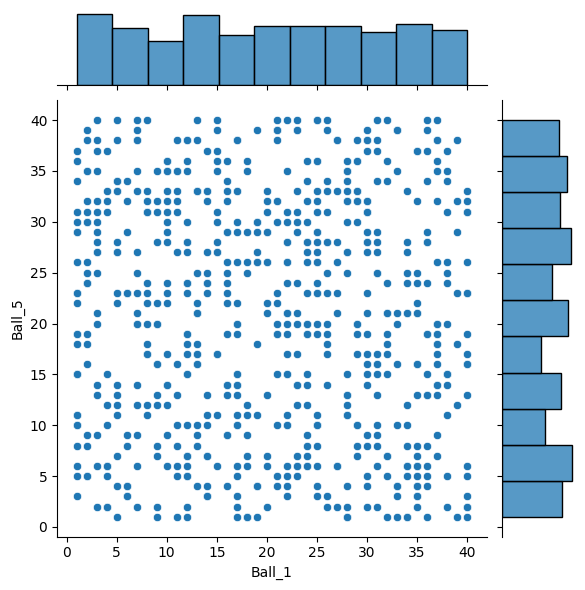

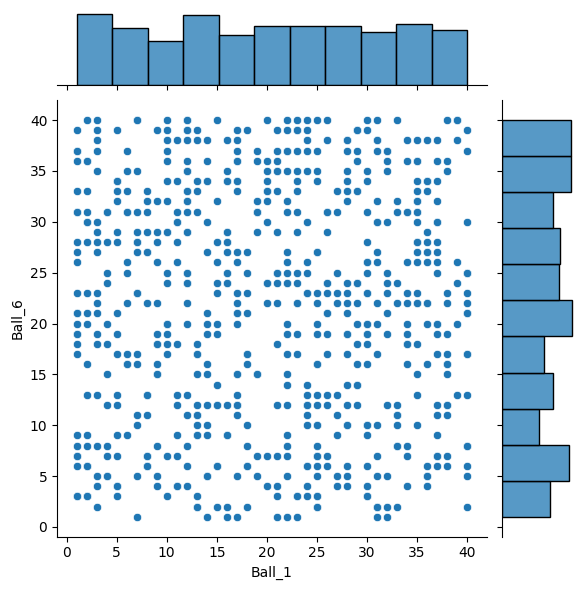

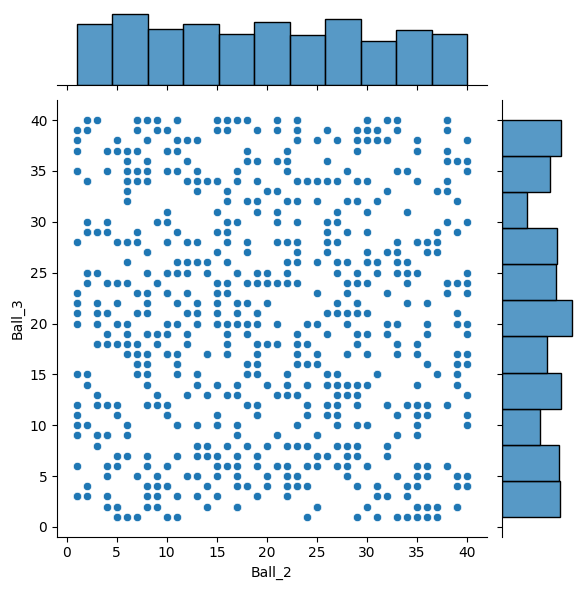

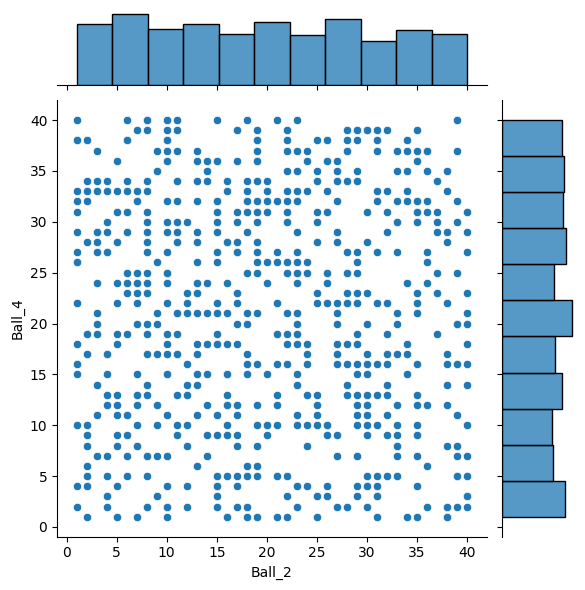

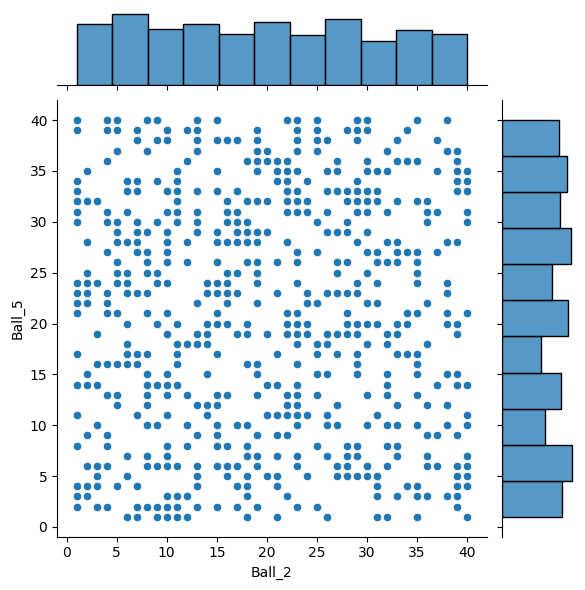

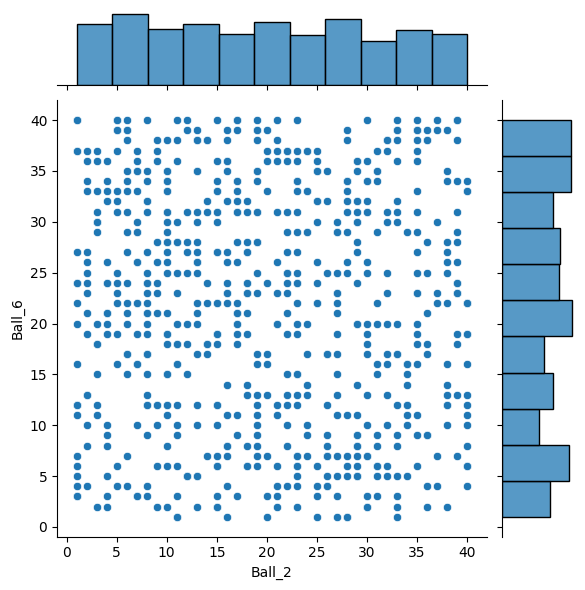

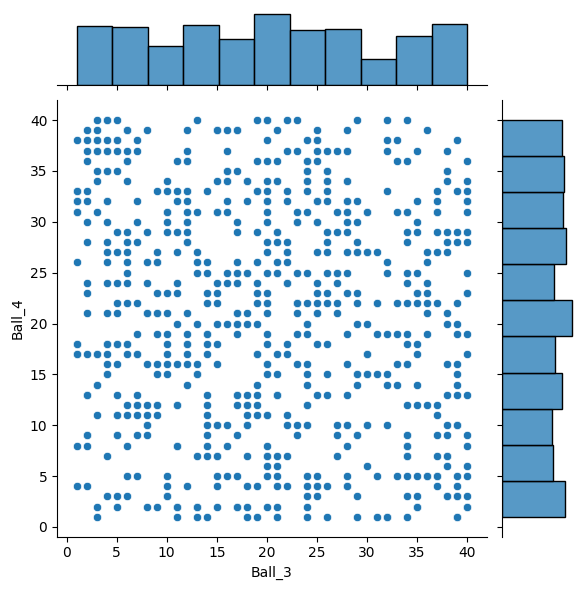

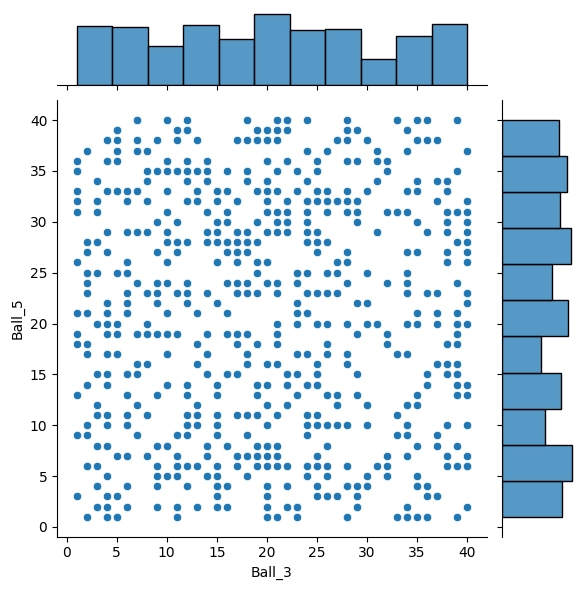

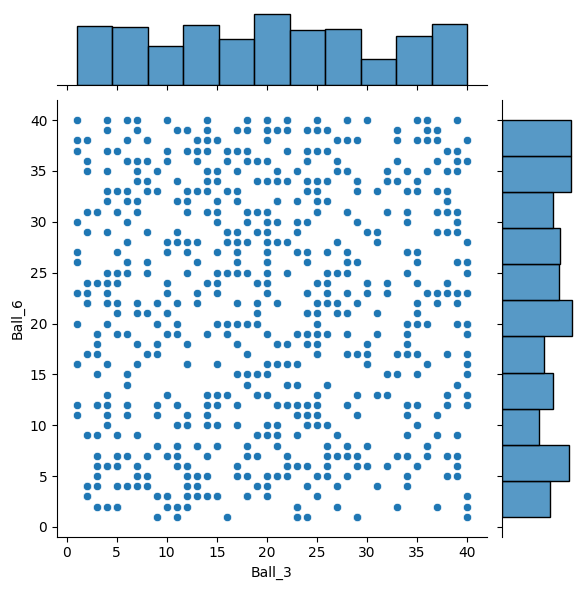

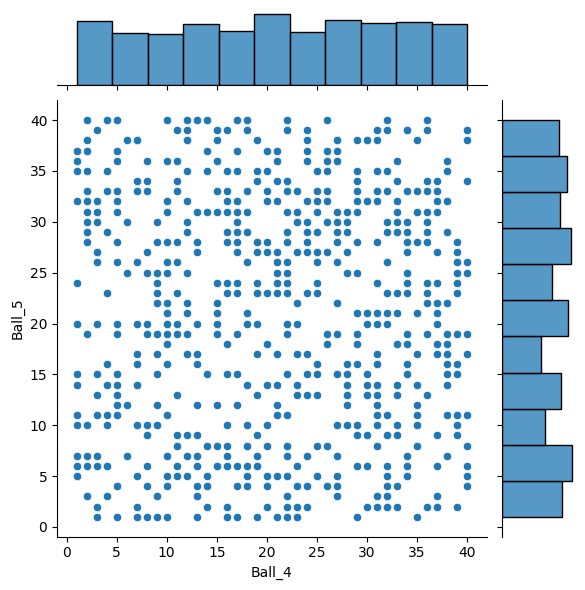

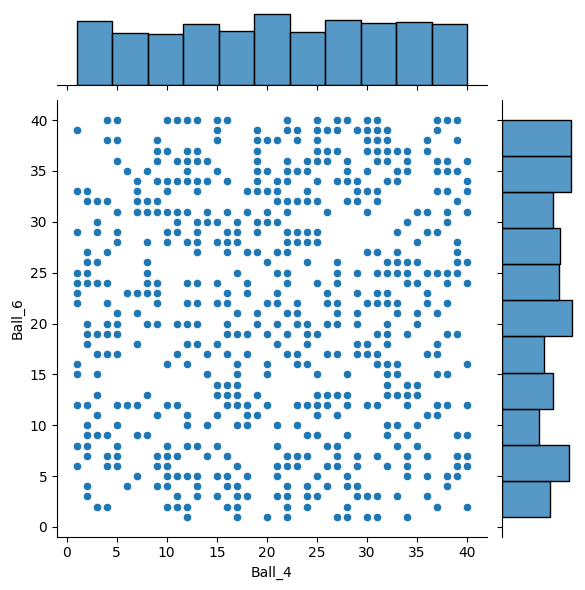

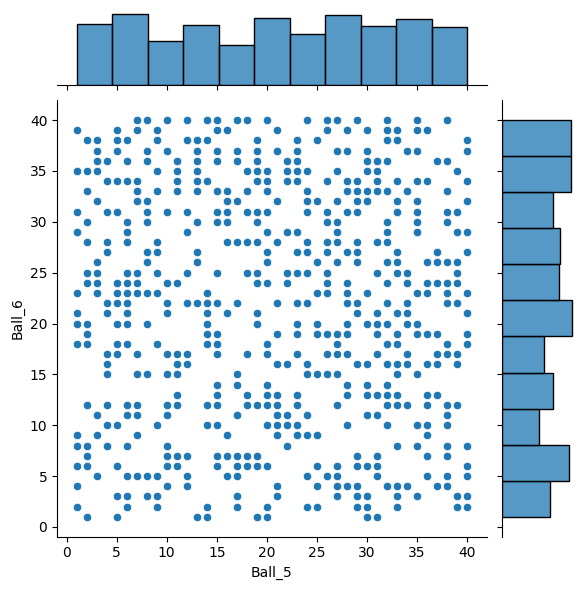

In [10]:
import sys
import traceback

for i in range(len(ball_columns)):
    for j in range(i+1, len(ball_columns)):
        try:
            sns.jointplot(x=ball_columns[i], y=ball_columns[j], data=balls_data, kind="scatter")
            plt.show()
        except Exception as e:
            traceback.print_exc(file=sys.stdout)
            break
            
# Contrast is to Ball_6 in this case.
# Here the contast ball-to-ball is plotted as slices of the Hyper-Tesseract.
# It is noteworthy that the relations are _not_ random - again, with the potential
# to allow a NN Activation function to make use of the data for further investigation

In [11]:
# Assuming 'balls_data' contains your lottery draw data
ball_columns = ['Ball_1', 'Ball_2', 'Ball_3', 'Ball_4', 'Ball_5', 'Ball_6']
# Convert ball numbers to 0-based indices
balls_data_indices = balls_data - 1

In [12]:
# Prepare data for sparse matrix
rows = []
cols = []
data = []

for index, row in balls_data_indices.iterrows():
    rows.append(index)  # Keep track of each draw
    # Convert the 6D coordinate to a single index in a flattened 1D space
    col_index = np.ravel_multi_index(tuple(row), (40,)*6)
    cols.append(col_index)
    data.append(1)  # Each draw gets a count of 1

# Convert lists to numpy arrays for efficiency
rows = np.array(rows)
cols = np.array(cols)
data = np.array(data)

# Create a COO sparse matrix
# Now shape is (number of draws, 40^6) where 40^6 is the total possible combinations
sparse_6d = sparse.coo_matrix((data, (rows, cols)), shape=(len(balls_data), 40**6))

# Convert to CSR for efficiency
sparse_6d_csr = sparse_6d.tocsr()

# The sparse matrix is _critical_ to understanding the statistic of combinatorics.
# If a non-sparse matrix is used, the amount of disk space and memory needed to perform an analysis
# is measured in Terabytes !
# In the future such computational resources may be inexpensive, but in 2025 they are prohibitive.
# The Sparse Matrix was evolved to allow analysis within a statistical universe that can be computed in small finite time.

In [13]:
# Example operations:
max_count = sparse_6d_csr.max()
# Instead of np.where, we check the max count directly since we know there's only one max in this context
max_index = np.unravel_index(sparse_6d_csr.argmax(), sparse_6d_csr.shape)

# This will return a tuple of indices where the maximum value is found
if max_count > 0:  # Check if there's at least one max count
    draw_id, combination_index = max_index
    combination = np.unravel_index(combination_index, (40,)*6)
    print(f"Highest frequency combination: {tuple(c + 1 for c in combination)} from draw {draw_id}")

# Count zero entries (combinations that never occurred)
zero_count = len(balls_data) * 40**6 - sparse_6d_csr.nnz
print(f"Number of combinations that never occurred: {zero_count}")

# The output of non-occurring combinations establishes whether all combinations are possible.
# However, this is only a function of time - perhaps. One consideration is that the Heatmaps indicate
# That the draws so far exhibit patterning
# The 'Prior Gamblers Fallacy' makes clear that past-performance does not allow forecast of future performance, or values.
# Therefore, this tool is an aid to understanding the limits of the statistical universe so far.

Highest frequency combination: (25, 28, 8, 2, 29, 7) from draw 0
Number of combinations that never occurred: 2863103999301


In [14]:
# Convert to COO format if not already
sparse_6d_coo = sparse_6d_csr.tocoo()

ball_frequencies = {}
for i in range(40):  # 40 balls
    # Count occurrences of ball i across all dimensions
    frequency = np.sum(np.any(sparse_6d_coo.col == i, axis=0)) + \
                np.sum(np.any(sparse_6d_coo.row == i, axis=0)) + \
                sum(np.sum(sparse_6d_coo.data * (sparse_6d_coo.coords[j] == i)) for j in range(2, len(sparse_6d_coo.coords)))
    
    ball_frequencies[i + 1] = frequency

print(ball_frequencies)

# One thing that stands out is that there is no special ball value outstanding over any other, confirming (for this tool) the validity
# of the 'Prior Gamblers Fallacy' in terms of using this interpretation to input data into a Neural Network for further analysis - that is
# the NN is not likely to have purchase on the raw data alone, which is in keeping with this statistical model type.

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1}


In [15]:
print("Number of non-zero elements:", sparse_6d_csr.nnz)
print("Shape of the matrix:", sparse_6d_csr.shape)

Number of non-zero elements: 699
Shape of the matrix: (699, 4096000000)


In [16]:
# Example for ball 1
print("Checking frequency for ball 1:")
for j in range(len(sparse_6d_coo.coords)):
    print(f"Dimension {j}:", np.sum(sparse_6d_coo.coords[j] == 0))  # 0 for ball 1 since we're 0-indexed

Checking frequency for ball 1:
Dimension 0: 1
Dimension 1: 0


In [17]:
# Print some non-zero entries to see what's in there
print(sparse_6d_coo.row[:10])  # First 10 row indices
print(sparse_6d_coo.col[:10])  # First 10 column indices
print(sparse_6d_coo.data[:10]) # First 10 data values

[0 1 2 3 4 5 6 7 8 9]
[2527170726  538879735 2511325699 1149695912 1371435680  590355316
 3842432542 1318522296 2223221893 1403345844]
[1 1 1 1 1 1 1 1 1 1]


# For fun - taking the heatmap information and trying to make a guess

The following code blocks are a set of functions to generate potential future lottery draws.
Its no better than any other random number generator, but it does attempt to make use of the information derived of the heatmapping

One thing that becomes immediately apparent is that this does **not** have the capacity to predict anything - a good test of this would be 
to run this code for a dataset of the previous draw, omitting that information in the data csv file fed into the array

The chances of predicting the next draw are of course extremely poor - this tool is practically speaking unlikely to allow you to win any money at all.
Re-running the __#Generate Multiple Sets__ code block will quickly demonstrate this to your satisfaction.

In [18]:
#Generator Blocks
def is_non_sequential(numbers):
    sorted_numbers = sorted(numbers)
    for i in range(len(sorted_numbers) - 1):
        if sorted_numbers[i+1] - sorted_numbers[i] == 1:
            return False
    return True

def generate_set(frequency_dict, size=6, num_balls=40):
    while True:
        # Sort balls by frequency in descending order
        sorted_balls = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)
        # Select top frequent balls
        mean_freq = np.mean(list(frequency_dict.values()))
        top_balls = [ball for ball, freq in sorted_balls if freq > mean_freq]
        
        # If less than required, add random balls
        if len(top_balls) < size:
            # Add random balls from the remaining pool
            remaining_balls = [ball for ball in range(1, num_balls + 1) if ball not in top_balls]
            top_balls.extend(random.sample(remaining_balls, size - len(top_balls)))
        
        # Shuffle to avoid always picking from the start
        random.shuffle(top_balls)
        
        # Select the required size, ensuring non-sequentiality
        selected_balls = []
        available_balls = top_balls[:]  # Work on a copy to avoid emptying the list
        while len(selected_balls) < size and available_balls:
            ball = available_balls.pop()
            if not selected_balls or (ball not in range(selected_balls[-1] - 1, selected_balls[-1] + 2)):
                selected_balls.append(ball)
        
        # If we couldn't select enough balls due to constraints, we'll try again
        if len(selected_balls) == size and is_non_sequential(selected_balls):
            return selected_balls

In [19]:
#Generate multiple sets
num_sets = 10  # Example number of sets to generate
all_sets = [generate_set(ball_frequencies) for _ in range(num_sets)]

# Print the sets
for i, s in enumerate(all_sets, 1):
    print(f"Set {i}: {s}")

Set 1: [9, 13, 26, 24, 39, 35]
Set 2: [33, 30, 23, 36, 15, 6]
Set 3: [6, 23, 33, 27, 21, 10]
Set 4: [30, 36, 40, 1, 6, 10]
Set 5: [21, 15, 39, 5, 10, 2]
Set 6: [30, 8, 35, 22, 10, 2]
Set 7: [37, 6, 30, 10, 3, 20]
Set 8: [9, 3, 5, 33, 39, 37]
Set 9: [35, 7, 15, 21, 23, 5]
Set 10: [22, 38, 35, 19, 9, 31]
